In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input

In [2]:
dataset_path = r"C:\Users\Rudradeep\Desktop\Python\pythonCollage\Collage_python\Lab 7\flowers"

data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = data_gen.flow_from_directory(
    directory=dataset_path,       
    target_size=(64, 64),         
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    directory=dataset_path,       
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [3]:
model = Sequential([
    Input(shape=(64, 64, 3)),        
    Flatten(),                       
    Dense(128, activation='relu'),   
    Dropout(0.5),                    
    Dense(64, activation='relu'),    
    Dropout(0.5),                   
    Dense(train_data.num_classes, activation='softmax')  
])

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
steps_per_epoch = len(train_data)  
validation_steps = len(val_data)   

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,  
    verbose=1,
    steps_per_epoch=steps_per_epoch,  
    validation_steps=validation_steps 
)

Epoch 1/20


c:\Users\Rudradeep\Desktop\Python\pythonCollage\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.2374 - loss: 2.5570 - val_accuracy: 0.2337 - val_loss: 1.6036
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


C:\Users\Rudradeep\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.2405 - loss: 1.6014 - val_accuracy: 0.2442 - val_loss: 1.6012
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.2443 - loss: 1.6073 - val_accuracy: 0.2465 - val_loss: 1.5976
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.2368 - loss: 1.5999 - val_accuracy: 0.2442 - val_loss: 1.5991
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.2388 - loss: 1.5996 - val_accuracy: 0.2442 - val_loss: 1.5986
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.2548 - loss: 1.5986 - val_accuracy: 0.2442 - 

In [6]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

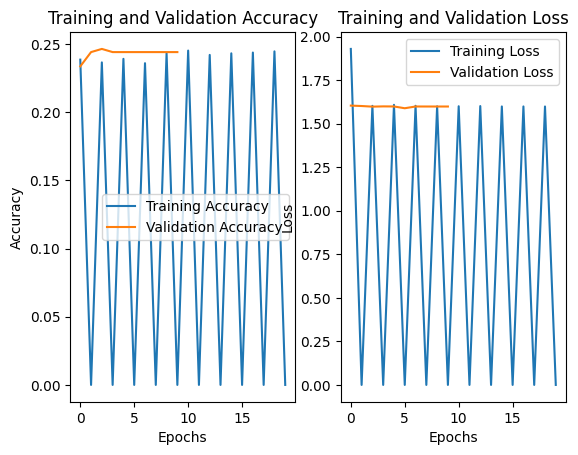

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.2306 - loss: 1.5998
Validation Loss: 1.5983
Validation Accuracy: 0.2442


In [7]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Final Evaluation
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")